In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Tratamento

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Age'] = data['Age'].fillna(data.Age.mean())

In [7]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [8]:
data['Embarked'] = data.Embarked.fillna('S')

In [9]:
data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [10]:
data['Cabin'] = data.Cabin.fillna('G6')

In [11]:
data.drop('Name', axis=1, inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

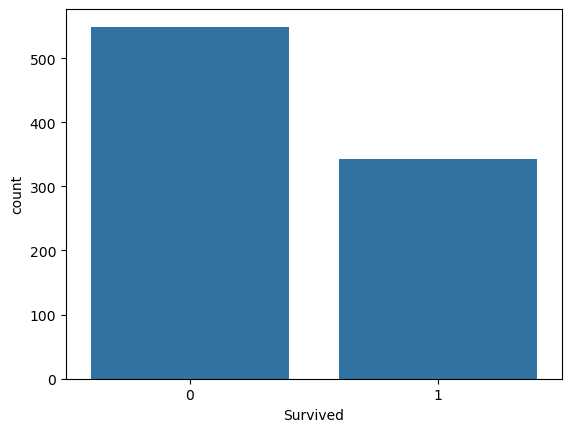

In [12]:
sns.countplot(x='Survived', data=data)

#### Encoder 

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [15]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[categorical_cols])

In [16]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data.drop(categorical_cols, axis=1), encoded_df], axis=1)

In [17]:
data.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Modelo

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from imblearn.combine import SMOTEENN

In [19]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [20]:
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
models = {
    'Naive Bayes' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(criterion='entropy', random_state=1),
    'Random Forest' : RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=5, random_state=1),
    'SVM' : SVC(kernel='rbf', random_state=1, C = 2.0),
    'KNN' : KNeighborsClassifier(n_neighbors=6, metric='minkowski', p = 2),
    'Logistic Regression' : LogisticRegression(class_weight='balanced', random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=1000, random_state=1),
    'MLP' : MLPClassifier(max_iter=1500, tol=0.0000100, solver = 'adam', activation = 'relu', hidden_layer_sizes = (20,20), random_state=1),
    'XGB' : xgb.XGBClassifier(n_estimators=1000,max_depth=9, random_state=1)
}

In [24]:
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

In [25]:
accuracie_data = pd.DataFrame(list(accuracies.items()), columns=['Model','Accuracy'])
accuracie_data

,Model,Accuracy
0,Naive Bayes,0.642202
1,Decision Tree,0.871560
2,Random Forest,0.917431
3,SVM,0.935780
4,KNN,0.605505
5,Logistic Regression,0.926606
6,Gradient Boosting,0.880734
7,MLP,0.926606
8,XGB,0.853211


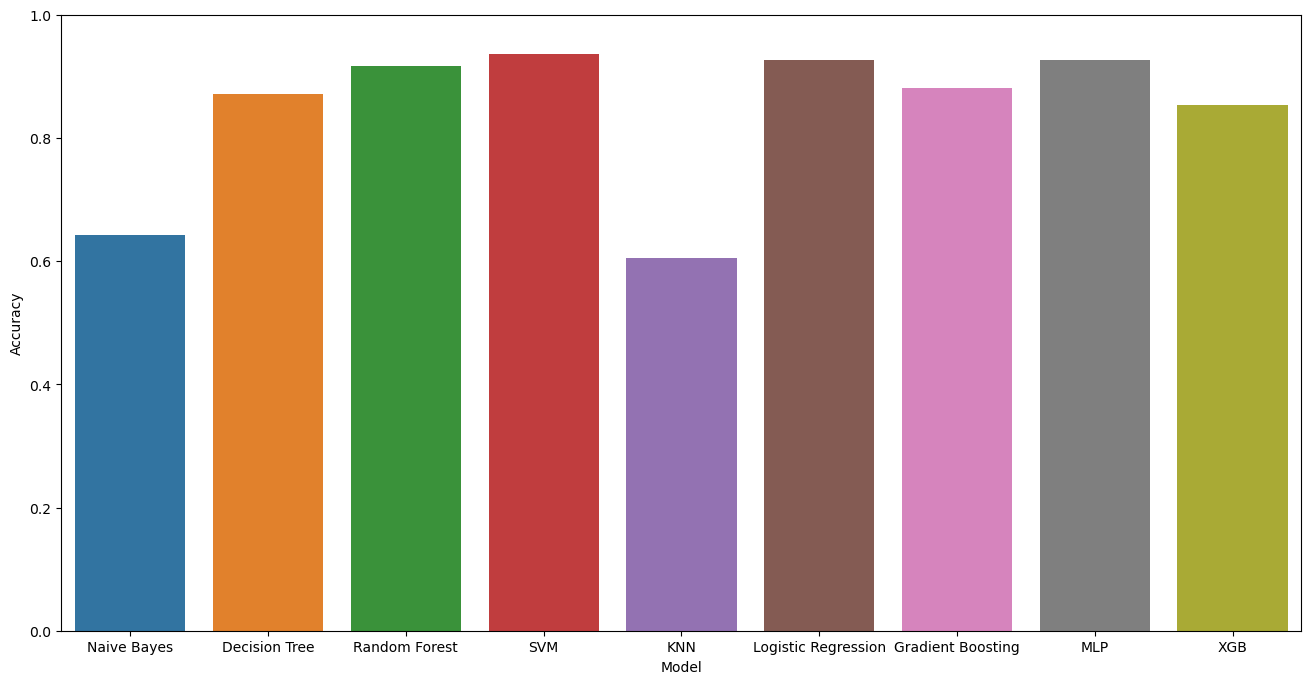

In [26]:
plt.figure(figsize=(16,8))
sns.barplot(x='Model', y='Accuracy', data=accuracie_data,hue='Model', palette='tab10', legend=False)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

In [27]:
model = SVC(kernel='rbf', random_state=1, C = 2.0).fit(X_train_scaled, y_train)
model_pred = model.predict(X_test_scaled)

In [28]:
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.97      0.92      0.95        66

    accuracy                           0.94       109
   macro avg       0.93      0.94      0.93       109
weighted avg       0.94      0.94      0.94       109



0.9357798165137615

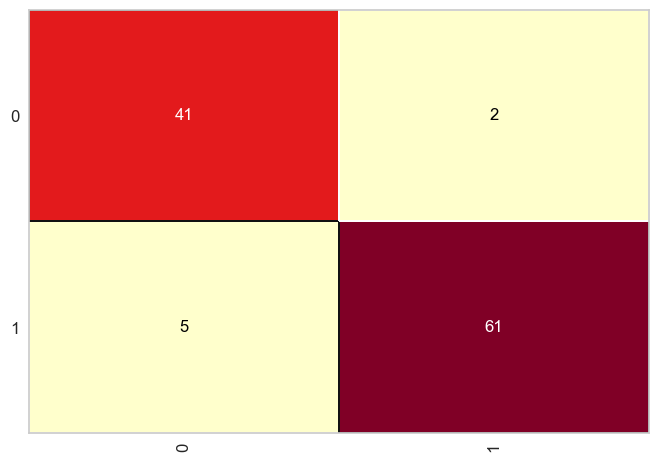

In [29]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)

#### Teste

In [30]:
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [31]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
test['Fare'] = test.Fare.fillna(test.Fare.mean())

In [33]:
test['Age'] = test.Age.fillna(test.Age.mean())

In [34]:
test.Cabin.value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [35]:
test['Cabin'] = test.Cabin.fillna('B66')

In [36]:
test.drop('Name', axis=1, inplace=True)

In [37]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(test[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))
test = pd.concat([test.drop(categorical_cols, axis=1), encoded_df], axis=1)
test.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110469,Ticket_110489,...,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,893,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
for col in X.columns:
    if col not in test.columns:
        new_columns = pd.DataFrame(0, index=test.index, columns=[col])
        test = pd.concat([test, new_columns], axis=1)
        test = test.copy()
        
for col in test.columns.to_list():
    if col not in X.columns:
        test.drop(col, axis=1, inplace=True)

In [39]:
test = test.drop(columns=['Survived'], errors='ignore')

y_predict = model.predict(test.to_numpy())
test.loc[:,'Survived'] = y_predict

In [40]:
results = test[['PassengerId', 'Survived']]
results.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [41]:
results.to_csv('results.csv', index=False)